## 任务二：图的邻接表存储结构的实现（难度：★★★★）

**实现基本功能**：

　　按照《数据结构》课本思路设计，有三个类：边结点类、顶点结点类以及邻接表存储结构的图类；

　1. 顶点结点类：只有初始化函数
 
　　（1）数据域：存储与顶点相关的信息
	
　　（2）链域：用于指向链表中第一个结点
 
　 2. 边结点类：也是只有初始化函数
	
　　（1）邻接点域：指示与顶点邻接点的位置
	
　　（2）链域：与顶点邻接的下一条边的结点
	
　　（3）数据域：存储边相关信息，如权值等

　3. 邻接表存储结构的图类：
 
　　（1）图的初始化

　　（2）输出顶点列表数据

　　（3）添加顶点

　　（4）有向图添加边

　　（5）输出有向图邻接表
	
　　（6）无向图添加边
	
　　（7）输出无向图邻接表
	
　【注：这个是根据自己理解写的函数，可以不按照我的思路，小伙伴们有更好的实现方式，可以自由发挥哈，只要能输出正确结果就可！】
	
**测试案例：**

　**（1）有向图：**

![Image Name](https://cdn.kesci.com/upload/image/qwy5k8vyso.png?imageView2/0/w/400/h/400)

　**输出结果：**
 
　　　　　　　V1 --> V2 --> V3 --> null
　　　　　　　V2  --> null
　　　　　　　V3 --> V4 --> null
　　　　　　　V4 --> V1 --> null
 
　**（2）无向图：**

![Image Name](https://cdn.kesci.com/upload/image/qwy5owqzi8.png?imageView2/0/w/400/h/400)


　**输出结果：**
 
　　　　　　　V1 --  V2 --  V3 --  V4
　　　　　　　V2 --  V1
　　　　　　　V3 --  V1 --  V4
　　　　　　　V4 --  V3 --  V1

### 1. 定义顶点结点类

In [1]:
## 顶点结点类
class VexNode():
    def __init__(self, data):
        self.data = data # 数据域：存储与顶点相关的信息
        self.firstarc = None # 链域：用于指向链表中第一个结点

### 2. 定义边结点类

In [2]:
## 边结点
class ArcNode():
    def __init__(self, data):
        self.adjvex = None # 邻接点域：指示与顶点邻接点的位置
        self.nextarc = None # 链域：与顶点邻接的下一条边的结点
        self.data = data # 数据域：存储边相关信息，如权值等

### 3. 定义邻接表存储结构的图类

In [3]:
## 邻接表存储结构的图
class ALGraph():
    # 初始化
    def __init__(self):
        self.vexlist = []
    
    # 输出顶点列表数据
    def PrintVertexData(self):
        data_list = []
        for vertex in self.vexlist:
            data_list.append(vertex.data) # 返回每个顶点的所存数据
        return data_list
    
    # 查找特定顶点的索引位置
    def LocateVex(self, arcnode):
        index = None
        for i in range(len(self.vexlist)): # 遍历整个顶点列表，找到对应当前顶点的索引
            if arcnode.data == self.vexlist[i].data:
                index = i
                break
        return index
    
    # 添加顶点
    def AddVertex(self, vexnode):
        self.vexlist.append(vexnode)
        
    # 有向图添加边
    def AddEdgeDG(self, start, end): # 注：start为顶点类型，end为边类型
        # 首先判断start和end所携带的数据是否跟顶点一样
        if start not in self.vexlist or end.data not in self.PrintVertexData():
            print("输入的边有误！")
            return
        
        end.adjvex = self.LocateVex(end) # 边结点的adjvex指针指向当前弧头顶点的位置
        # 如果当前顶点第一次添加边
        if start.firstarc == None:
            start.firstarc = end # 则顶点的firstarc直接指向end
            return
        nod = start.firstarc
        while nod.nextarc != None:
            nod = nod.nextarc
        nod.nextarc = end
        
    # 输出有向图邻接表
    def PrintAdjacencyListDG(self):
        for vex in self.vexlist:
            if vex.firstarc == None:
                print(vex.data, ' --> null')
                continue
            print(vex.data, end = ' --> ')
            nod = vex.firstarc
            while nod != None:
                print(nod.data, end = ' --> ')
                nod = nod.nextarc
            print('null')
    
    # 无向图添加边
    def AddEdgeDN(self, start, end): # 注：start为顶点类型，end为边类型
        # 首先判断start和end所携带的数据是否跟顶点一样
        if start not in self.vexlist or end.data not in self.PrintVertexData():
            print("输入的边有误！")
            return
        
        # 正向
        end.adjvex = start # 边结点的adjvex指针指向当前顶点
        # 如果当前顶点第一次添加边
        if start.firstarc == None:
            start.firstarc = end # 则顶点的firstarc直接指向end
        else:
            nod = start.firstarc
            while nod.nextarc != None:
                nod = nod.nextarc
            nod.nextarc = end
        
        # 逆向
        for vex in self.vexlist:
            if vex.data == end.data:
                temp_end = vex
                break
        temp_start = ArcNode(start.data)
        temp_end.adjvex = temp_start
        # 如果当前顶点第一次添加边
        if temp_end.firstarc == None:
            temp_end.firstarc = temp_start # 则顶点的firstarc直接指向
        else:
            nod = temp_end.firstarc
            while nod.nextarc != None:
                nod = nod.nextarc
            nod.nextarc = temp_start
    
    # 输出无向图邻接表
    def PrintAdjacencyListDN(self):
        for vex in self.vexlist:
            print(vex.data, end = '')
            nod = vex.firstarc
            while nod != None:
                print(' -- ', nod.data, end = '')
                nod = nod.nextarc
            print('')

### 4. 创建一个邻接表存储的图对象，并添加4个顶点，分别为V1,V2,V3,V4

In [4]:
graph_DG = ALGraph()
V1 = VexNode('V1')
V2 = VexNode('V2')
V3 = VexNode('V3')
V4 = VexNode('V4')
vexs = [V1, V2, V3, V4]
for vex in vexs:
    graph_DG.AddVertex(vex) # 将顶点添加到列表中
graph_DG.PrintVertexData()

['V1', 'V2', 'V3', 'V4']

### 5. 实现一个有向图，如下图所示，根据图需添加4条边

![Image Name](https://cdn.kesci.com/upload/image/qwy5k8vyso.png?imageView2/0/w/400/h/400)
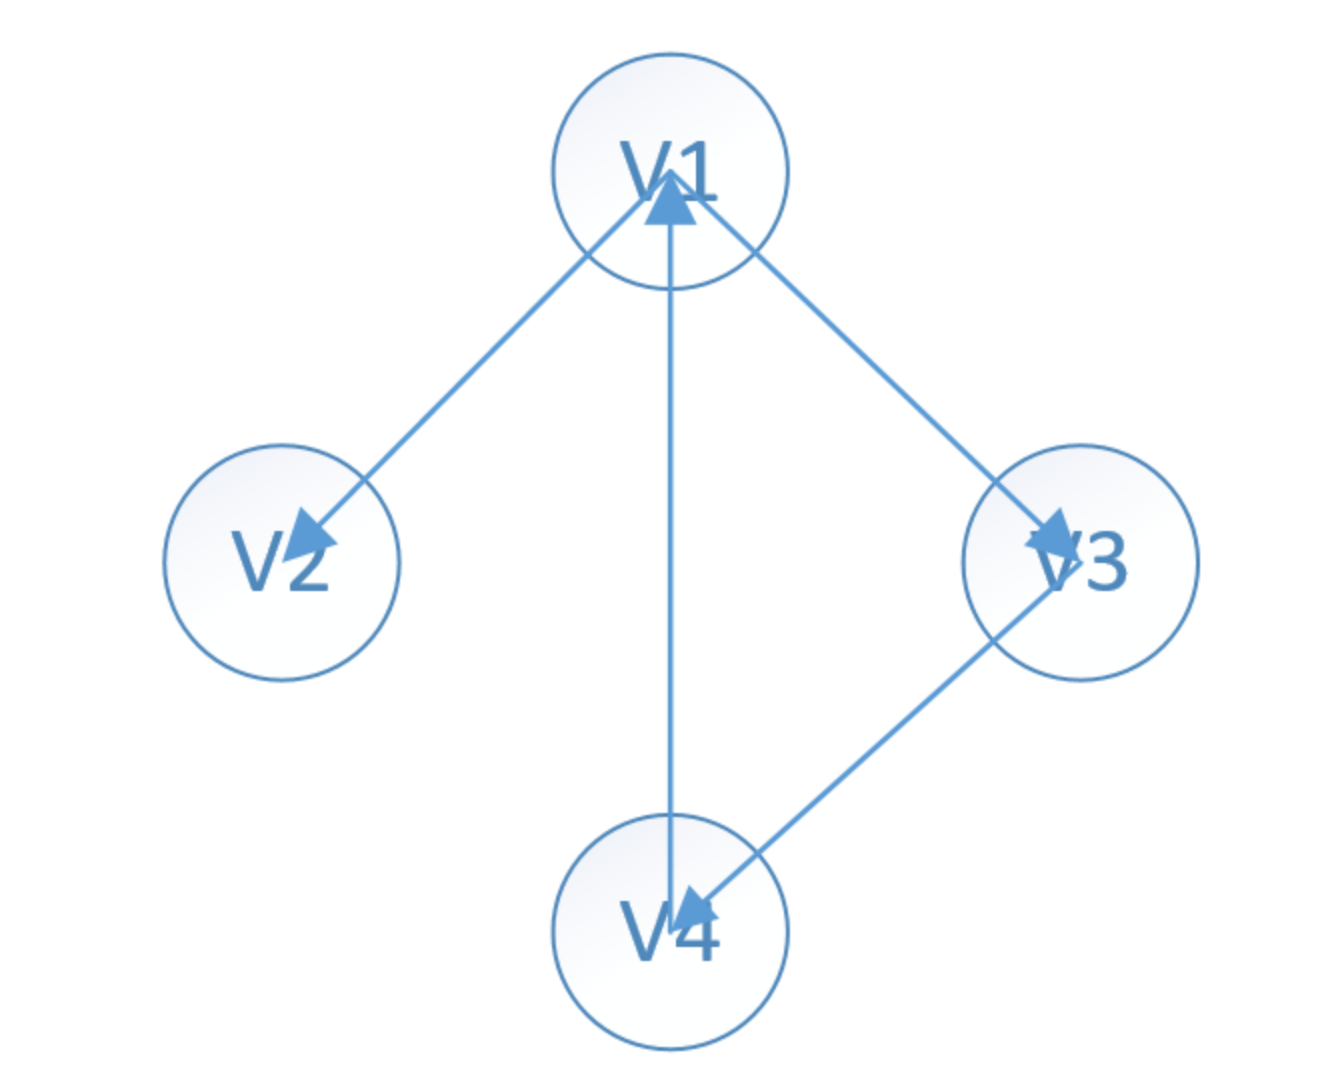

In [5]:
# 有向图添加边
graph_DG.AddEdgeDG(V1, ArcNode('V2'))
graph_DG.AddEdgeDG(V1, ArcNode('V3'))
graph_DG.AddEdgeDG(V3, ArcNode('V4'))
graph_DG.AddEdgeDG(V4, ArcNode('V1'))

graph_DG.PrintAdjacencyListDG()

V1 --> V2 --> V3 --> null
V2  --> null
V3 --> V4 --> null
V4 --> V1 --> null


### 6. 实现一个无向图，如下图所示，根据图需添加4条边

![Image Name](https://cdn.kesci.com/upload/image/qwy5owqzi8.png?imageView2/0/w/400/h/400)
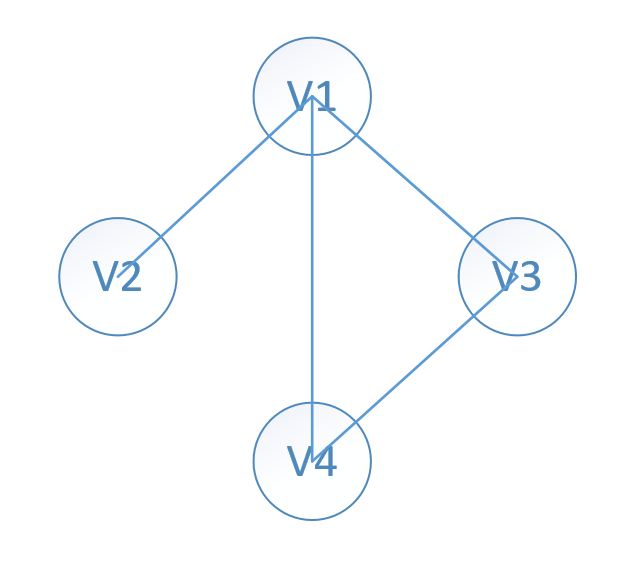

In [6]:
graph_DN = ALGraph()

V1 = VexNode('V1')
V2 = VexNode('V2')
V3 = VexNode('V3')
V4 = VexNode('V4')
vexs = [V1, V2, V3, V4]

for vex in vexs:
    graph_DN.AddVertex(vex) # 将顶点添加到列表中

# 无向图添加边
graph_DN.AddEdgeDN(V1, ArcNode('V2'))
graph_DN.AddEdgeDN(V1, ArcNode('V3'))
graph_DN.AddEdgeDN(V3, ArcNode('V4'))
graph_DN.AddEdgeDN(V4, ArcNode('V1'))

graph_DN.PrintAdjacencyListDN()

V1 --  V2 --  V3 --  V4
V2 --  V1
V3 --  V1 --  V4
V4 --  V3 --  V1
